In [1]:
import requests
import json
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

API_KEY = '1a9ea75b5f92dfda381d817fc00e5458' 
USER_AGENT = '808e0a8bbaf9d30bf181edb60c742824'  
LIMIT = 20  ##Número de resultados a obtener

headers = {
    'user-agent': USER_AGENT
}

##sacar top artists
def get_top_artists():
    params = {
        'method': 'chart.getTopArtists',
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['artists']['artist'])
    else:
        print(f"Error en la solicitud de top artistas globales: {response.status_code}")
    time.sleep(1)
    return df

##sacar top artistas por pais
def get_top_artists_by_country(country):
    params = {
        'method': 'geo.getTopArtists',
        'country': country,
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['topartists']['artist'])
    else:
        print(f"Error en la solicitud de top artistas por país: {response.status_code}")
    time.sleep(1)
    return df

##sacar top canciones por pais
def get_top_tracks_by_country(country):
    params = {
        'method': 'geo.getTopTracks',
        'country': country,
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['tracks']['track'])
    else:
        print(f"Error en la solicitud de top canciones por país: {response.status_code}")
    time.sleep(1)
    return df


##sacar top album de x artista
def get_top_tracks_by_artist(artist):
    
    params = {
        'method': 'artist.getTopTracks',
        'artist': artist,
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['toptracks']['track'])
    else:
        print(f"Error en la solicitud de top álbumes del artista: {response.status_code}")
    time.sleep(1)
    return df
    
##limpia y ordena dataframe
def limpiar_y_ordenar(df, columnas_a_eliminar=None):
    if columnas_a_eliminar:
        df = df.drop(columns=columnas_a_eliminar)
    if 'listeners' in df.columns:
        df = df.sort_values(by='listeners', ascending=False)
    df = df.reset_index(drop=True)
    return df

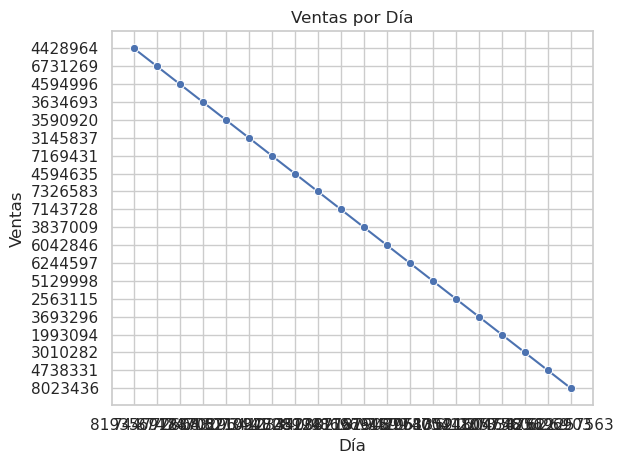

In [11]:
df_top_artist = get_top_artists()
df_top_artist

# Crear el gráfico de líneas
sns.set(style='whitegrid')
sns.lineplot(data=df_top_artist, x='playcount', y='listeners', marker='o')

plt.ylabel('Ventas')
plt.xlabel('Día')
plt.tight_layout()
plt.show()

In [ ]:
df_top_artist_filtered = limpiar_y_ordenar(df_top_artist, ["mbid", "url", "streamable", "image"])
df_top_artist_filtered

In [ ]:
df_top_artist_filtered.info()

In [ ]:
df_top_artist_filtered[["playcount", "listeners"]] = df_top_artist_filtered[["playcount", "listeners"]].astype(float)
df_top_artist_filtered.info()

In [ ]:
media_playcount = df_top_artist_filtered["playcount"].mean()
media_playcount

In [ ]:
media_listeners = df_top_artist_filtered["listeners"].mean()
media_listeners

In [ ]:
mediana_playcount = df_top_artist_filtered["playcount"].median()
mediana_playcount

In [ ]:
mediana_listeners = df_top_artist_filtered["listeners"].median()
mediana_listeners

In [ ]:
sns.barplot(x = "name", y = "playcount", data = df_top_artist_filtered)
plt.xticks(rotation=90)
plt.axhline(mediana_playcount, color='red', linestyle='--', label=f'Mediana: {mediana_playcount}')
plt.axhline(media_playcount, color='green', linestyle='--', label=f'Media: {media_playcount}')
plt.legend()
plt.show()

In [ ]:
sns.barplot(x = "name", y = "listeners", data = df_top_artist_filtered)
plt.xticks(rotation=90)
plt.axhline(mediana_listeners, color='red', linestyle='--', label=f'Mediana: {mediana_listeners}')
plt.axhline(media_listeners, color='green', linestyle='--', label=f'Media: {media_listeners}')
plt.legend()
plt.show()

In [ ]:
sns.barplot(x = "listeners", y = "playcount", data = df_top_artist_filtered)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import scipy
from scipy import stats

listeners= df_top_artist_filtered["listeners"]
playcount= df_top_artist_filtered["playcount"]
stats.pearsonr(listeners, playcount)[0]

In [ ]:
sns.set(style='whitegrid')
sns.lineplot(data=df_top_artist_filtered, x='listeners', y='playcount', marker='o')
 
plt.ylabel('Listeners')
plt.xlabel('Playcount')
plt.tight_layout()
plt.show()
#El número de oyentes de los artistas no influye directamente en el número de reproducciones.

In [ ]:
# df_log = df_top_artist_filtered[["listeners", "playcount"]].apply(lambda x: np.log(x + 1))
# df_log

In [ ]:
get_top_artists_by_country("Spain")

In [ ]:
get_top_tracks_by_country("United States")

In [ ]:
get_top_albums_by_artist("Lana del Rey")